#importing libraries

pip install <--library name-->

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.colors as clrs
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Generating data

In [2]:
data,labels=make_blobs(n_samples=1000,n_features=2,centers=2)

#plotting of dataset


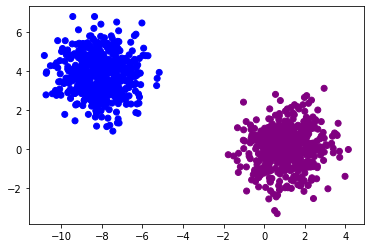

In [3]:
c_map=clrs.LinearSegmentedColormap.from_list("",["purple","green","blue"])
plt.scatter(data[:,0],data[:,1],c=labels,cmap=c_map)
plt.show()

In [4]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,train_size=0.8)

#neural_network

In [5]:
class neuron():
    def __init__(self):
        self.w1=np.random.randn()
        self.w2=np.random.randn()
        self.w3=np.random.randn()
        self.w4=np.random.randn()
        self.w5=np.random.randn()
        self.w6=np.random.randn()
        self.b1=0
        self.b2=0
        self.b3=0
        
    def sigmoid(self,x):
        return 1.0/(1+np.exp(-x))
    
    def forwardpass(self,x):
        self.x1,self.x2=x
        self.a1=self.x1*self.w1+self.x2*self.w3+self.b1
        self.h1=self.sigmoid(self.a1)
        self.a2=self.x1*self.w2+self.x2*self.w4+self.b2
        self.h2=self.sigmoid(self.a2)
        self.a3=self.h1*self.w5+self.h2*self.w6+self.b3
        self.h3=self.sigmoid(self.a3)
        return self.h3
    
    def grad(self,x,y):
        self.forwardpass(x)
        self.dw1=(self.h3-y)*(self.h3)*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x1
        self.dw2=(self.h3-y)*(self.h3)*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x1
        self.dw3=(self.h3-y)*(self.h3)*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x2
        self.dw4=(self.h3-y)*(self.h3)*(1-self.h3)*self.w6*(1-self.h2)*self.h2*self.x2
        self.dw5=(self.h3-y)*(self.h3)*(1-self.h3)*self.h1
        self.dw6=(self.h3-y)*(self.h3)*(1-self.h3)*self.h2
        self.db1=(self.h3-y)*(self.h3)*(1-self.h3)*self.w5*self.h1*(1-self.h1)
        self.db2=(self.h3-y)*(self.h3)*(1-self.h3)*self.w6*self.h2*(1-self.h2)
        self.db3=(self.h3-y)*(self.h3)*(1-self.h3)
        
    def fit(self,X,Y,lrn=0.01,epochs=1000,display_loss=True,initialise=True):
        if initialise:
                self.w1=np.random.randn()
                self.w2=np.random.randn()
                self.w3=np.random.randn()
                self.w4=np.random.randn()
                self.w5=np.random.randn()
                self.w6=np.random.randn()
                self.b1=0
                self.b2=0
                self.b3=0
        if display_loss:
               losses={}
                
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
                dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3=[0]*9
                for x,y in zip(X,Y):
                    self.grad(x,y)
                    dw1+=self.dw1
                    dw2+=self.dw2
                    dw3+=self.dw3
                    dw4+=self.dw4
                    dw5+=self.dw5
                    dw6+=self.dw6
                    db1+=self.db1
                    db2+=self.db2
                    db3+=self.db3
                m=X.shape[1]
                self.w1-=lrn*dw1/m
                self.w2-=lrn*dw2/m
                self.w3-=lrn*dw3/m
                self.w4-=lrn*dw4/m
                self.w5-=lrn*dw5/m
                self.w6-=lrn*dw6/m
                self.b1-=lrn*db1/m
                self.b2-=lrn*db2/m
                self.b3-=lrn*db3/m
                
                if display_loss:
                    y_pred=self.predict(X)
                    loss=mean_squared_error(Y,y_pred)
                    losses[i]=loss
        if display_loss:
                lists=losses.items()
                x,y=zip(*lists)
                plt.plot(x,y,color="red")
                plt.show()
                
    def predict(self,X):
        y_pred=[]
        for x in X:
                pred=self.forwardpass(x)
                y_pred.append(pred)
        return np.array(y_pred)
                

In [6]:
sn=neuron()

#training the neural network on train_data

C:\Users\Annamalai\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


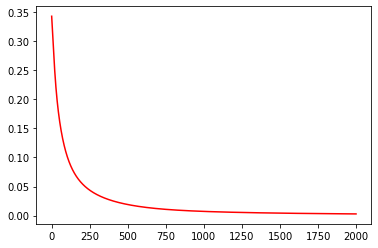

In [7]:
sn.fit(x_train,y_train,epochs=2000,lrn=0.001)

#predicting on test_data

In [109]:
ans=sn.predict(x_test)

In [110]:
ans=ans>0.5

In [111]:
ans2=ans.astype("int")

In [112]:
ans,ans2

(array([ True, False, False, False, False, False,  True,  True,  True,
        False, False,  True, False, False,  True,  True,  True,  True,
         True,  True, False,  True, False,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True, False,  True, False,
         True, False, False, False,  True, False,  True,  True,  True,
        False, False,  True,  True, False,  True,  True, False,  True,
         True, False, False, False,  True, False,  True,  True, False,
         True,  True, False,  True, False,  True, False, False, False,
        False, False, False, False,  True,  True, False,  True,  True,
        False, False, False,  True,  True, False,  True, False,  True,
        False, False,  True, False,  True, False, False, False, False,
        False,  True, False, False, False,  True,  True,  True, False,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  True, False, False,  True, False,
      

#validation

In [106]:
confusion_matrix(ans,y_test)

array([[105,   0],
       [  0,  95]], dtype=int64)